#### Nama : Jessica Athalia Rieuwpassa 
#### Kode Peserta : PYTN-KS01-005

# Final Project 1

## Perkenalan

Objektif yang ingin dicapai dari final project 1 ini yaitu mengevaluasi konsep regression sebagai berikut :
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

Dataset yang digunakan yaitu **Uber and Lyft Dataset Boston, MA** yang berisi record data perjalanan taksi uber dan lyft di Boston, MA. Dataset ini terdiri dari 57 kolom dan 693.071 data. Dataset diperoleh dari kaggle dengan link sebagai berikut https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

Dataset ini mengandung banyak nilai NA dan outliers maka cocok untuk dilakukan data cleaning dan preprocessing. Selain itu, dataset ini juga terdiri dari banyak kolom (variabel) sehingga sangat cocok untuk membuat model regresi linier untuk melihat pola antara variabel-variabel yang berbeda, serta membuat suatu prediksi berdasarkan model regresi linier. 

Pada final project 1 ini akan dibuat prediksi harga taksi Uber dan Lyft (cab price), sehingga variabel price akan menjadi variabel dependen (variabel prediktor) dan beberapa variabel lainnya yang memiliki korelasi dengan variabel price akan menjadi variabel independen.

## Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pickle

In [3]:
pd.set_option("display.max.columns", None)

## Data Loading

In [4]:
df = pd.read_csv("rideshare_kaggle.csv")
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [5]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Dataset ini memiliki 57 atribut. Atribut dalam dataset ini antara lain :
1. id : unique identifier for each column
2. timestamp : unix timestamp
3. hour : hour of the day
4. day : day of the week
5. month : month in a year
6. datetime : date value
7. Timezone
8. source : initial source of the ride
9. destination : destination of the ride
10. cab_type : the type of cab
11. product_id
12. name
13. price
14. distance
15. surge_multiplier
16. . . . dan lainnya

## Data Cleaning 

In [6]:
# Print the dimension of data set
df.shape

(693071, 57)

In [7]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

### Cek data types

In [8]:
#Melihat tipe objek masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dataset terdiri dari column dengan tipe object, int, dan float

In [9]:
# menghapus data column yang tidak diperlukan
data = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude'],axis = 1)
print(data.shape)
data.head()

(693071, 40)


,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureHighTime,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,1544968800,34.19,37.95,27.39,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.1299,1.0,0.94,11.98,11.98,4.786,47.30,1543251600,42.10,43.92,36.20,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,1543320000,33.10,44.12,29.11,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,1543510800,28.90,38.53,26.20,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,1543420800,36.71,35.75,30.29,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


### Cek data temperature dengan price

In [10]:
# membuat data frame baru yang terdiri dari variabel price dan temperature
data_new = data[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
data_new.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


<AxesSubplot:>

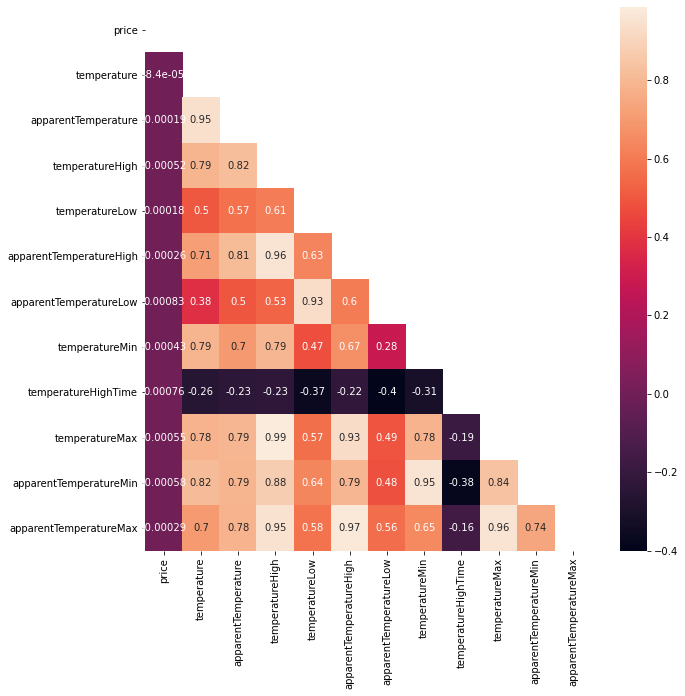

In [11]:
#membuat plot heatmap untuk melihat korelasi antara variabel price dan temperature
plt.figure(figsize=(10,10))
sns.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Dari plot di atas dapat dilihat antara variabel prediktor (price) dengan variabel-variabel temperature memiliki korelasi yang sangat lemah karena nilai-nilainya hampir 0 sehingga variabel-variabel temperature dapat dihapus.

In [12]:
# drop data temperature features
data_new = data[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
data = data.drop(data_new.columns,axis=1)
data.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,10.000,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,0.1299,1.0,0.94,11.98,11.98,4.786,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,0.0000,0.0,0.75,7.33,7.33,10.000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,0.0000,0.0,0.73,5.28,5.28,10.000,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,10.000,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


### Cek Data Categorical

In [13]:
cat_col = data.select_dtypes(include=['object','category']).columns.tolist()
data_cat = data[cat_col]
data_cat.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


In [14]:
# jumlah unique values pada data_cat
data_cat.nunique()

timezone          1
source           12
destination      12
cab_type          2
product_id       13
name             13
short_summary     9
icon              7
dtype: int64

In [15]:
# unique values pada data_cat
for col in data_cat:
    print(f'{col} : {data_cat[col].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' M

Dari cek unique values terlihat bahwa variable timezone hanya memiliki 1 unique value yaitu 'America/New_York' sehingga variabel timezone dapat dihapus.

In [16]:
data_cat['product_id'].value_counts()

6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_premier                            51235
lyft                                    51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

Variabel product_id terdiri lebih dari 50% value dengan junk data (contoh : 6f72dfc5-27f1-42e8-84db-ccc7a75f6969) sehingga variabel product_id lebih baik dihapus.

In [17]:
# drop data timezone and product_id
data = data.drop(['product_id','timezone'],axis=1)
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,10.000,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,0.1299,1.0,0.94,11.98,11.98,4.786,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,0.0000,0.0,0.75,7.33,7.33,10.000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,0.0000,0.0,0.73,5.28,5.28,10.000,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,10.000,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


### Cek Data Numerical

In [18]:
num_col = data.select_dtypes(include=['int64','float64']).columns.tolist()
data_num = data[num_col]
data_num.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax'],
      dtype='object')

sebagian besar column dengan tipe numerical (int64 dan float64) merupakan column dengan variabel climate. Selanjutnya akan dicek korelasi antara variabel-variabel climate dengan variabel price.

### Cek data climate dengan price

In [19]:
# membuat data frame dengan variabel climate dan price
cli_col = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data_cli = data[cli_col]
data_cli.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<AxesSubplot:>

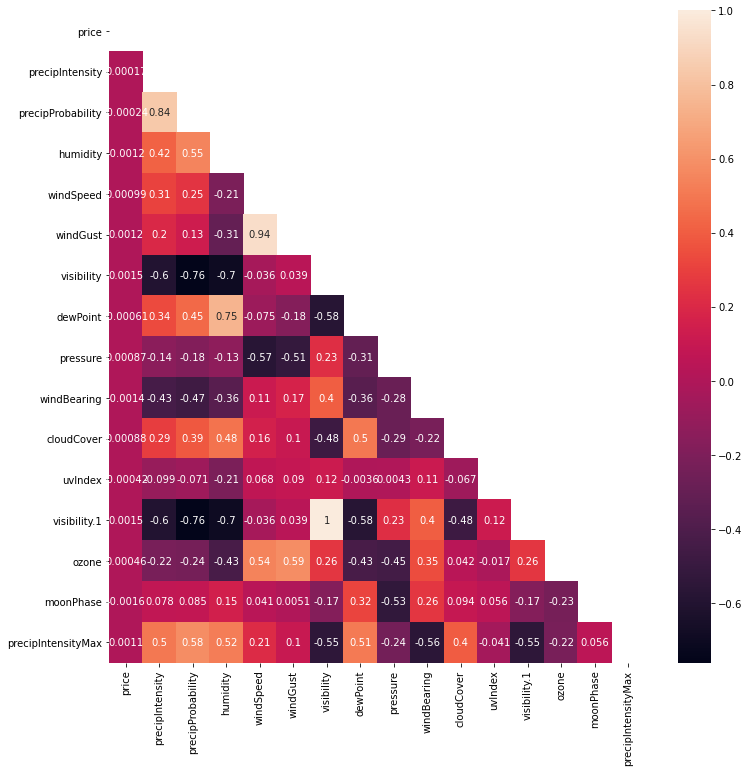

In [20]:
#membuat plot heatmap untuk melihat korelasi pada data_cli
plt.figure(figsize=(12,12))
sns.heatmap(data_cli.corr(),annot=True, mask=np.triu(data_cli.corr()))

Dari plot di atas dapat dilihat bahwa korelasi antara variabel prediktor (price) dengan variabel-variabel climate memiliki korelasi yang lemah karena nilainya hampir 0, sehingga variabel-variabel temperature tersebut dapat dihapus.

In [21]:
# drop data climate features
cli_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data = data.drop(cli_col,axis=1)
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [22]:
data.shape

(693071, 12)

## Data Preprocessing

### Data encoding

Pada tahap data encoding dilakukan untuk variabel-variabel dengan tipe object dan category dengan tujuan untuk mengubah dari nilai object/category menjadi numeric (0 dan 1) sehingga variabel-variabel tersebut dapat diproses lebih lanjut.

In [23]:
from sklearn.preprocessing import OneHotEncoder
cat_col = data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

# menjalankan OneHotEncoder dan menggabungkan data frame original (data) dengan data frame hasil encoding (enc_df)
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(data[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    data = data.drop(col, axis=1)
    data = pd.concat([data, enc_df], axis=1)

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [24]:
data.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi',
       'name_UberPool',

In [25]:
data.head()

,hour,day,month,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Data di atas merupakan hasil penggabungan dataframe original dan data hasil encoding yang akan digunakan untuk tahap selanjutnya. Pada data di atas terdapat variabel-variabel baru yaitu kolom source, destination, name, summary, dan icon. Maka tahap selanjutnya yaitu cek korelasi kolom-kolom tersebut dengan variabel prediktor (price).

### Cek data source dengan price

In [26]:
# membuat dataframe dengan variabel price dan source
src_col = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay']
data_src = data[src_col]
data_src.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

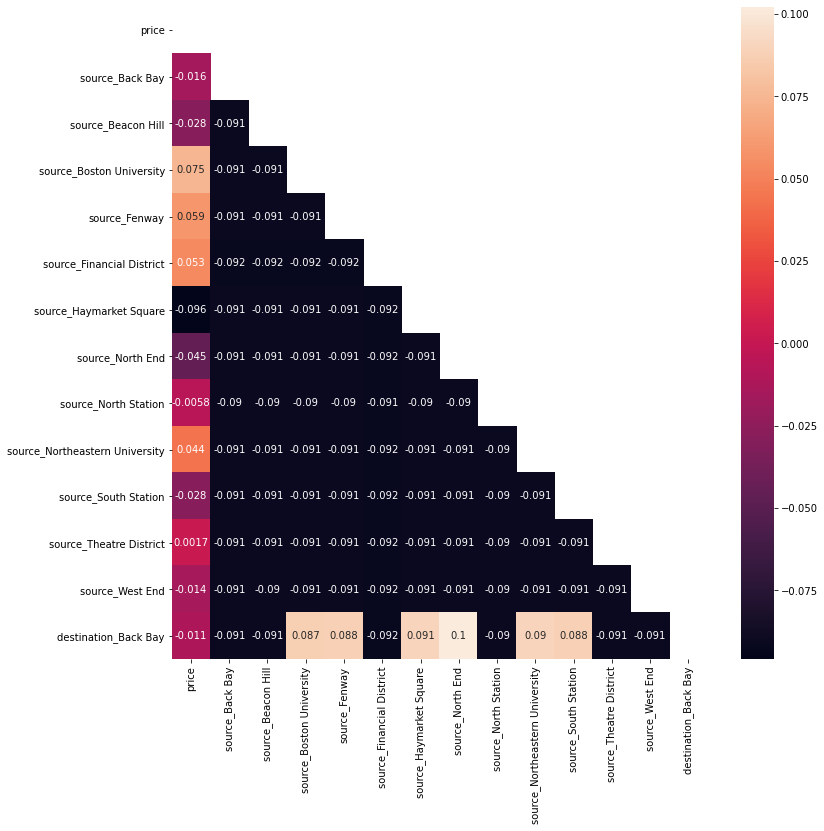

In [27]:
# membuat plot heatmap untuk melihat korelasi pada data_src
plt.figure(figsize=(12,12))
sns.heatmap(data_src.corr(),annot=True, mask=np.triu(data_src.corr()))

Dari plot di atas dapat dilihat bahwa antara variabel prediktor (price) tidak memiliki korelasi dengan variabel-variabel source karena nilai korelasinya negatif dan ada juga yang hampir 0, sehingga variabel-variabel source tersebut dapat dihapus.

In [28]:
src_cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End']
data = data.drop(src_cols,axis=1)

In [29]:
print(data.shape)
data.head()

(693071, 49)


,hour,day,month,price,distance,surge_multiplier,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Cek data destination dengan price

In [30]:
# membuat dataframe dengan variabel price dan destination
dst_col = ['price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
data_dst = data[dst_col]
data_dst.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

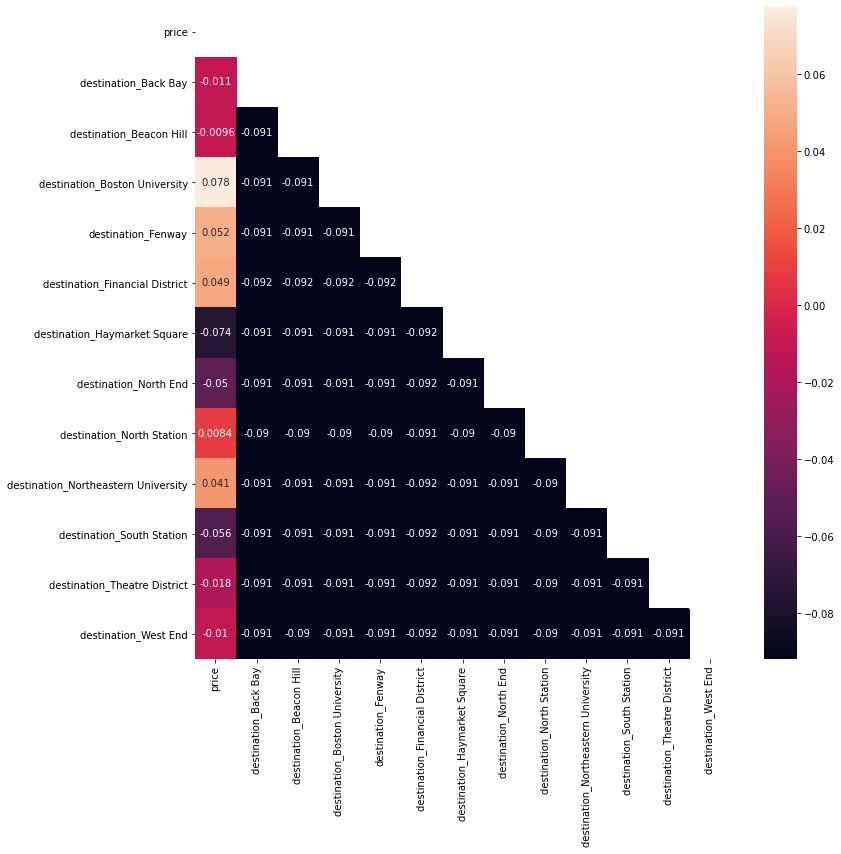

In [31]:
# membuat plot heatmap untuk melihat korelasi pada data_dst
plt.figure(figsize=(12,12))
sns.heatmap(data_dst.corr(),annot=True, mask=np.triu(data_dst.corr()))

Dari plot di atas dapat dilihat bahwa antara variabel prediktor (price) tidak memiliki korelasi dengan variabel-variabel destination karena nilai korelasinya negatif dan ada juga yang hampir 0, sehingga variabel-variabel destination tersebut dapat dihapus.

In [32]:
# drop source dan destination column value
dst_cols = ['destination_Back Bay','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
data = data.drop(dst_cols,axis=1)

In [33]:
print(data.shape)
data.head()

(693071, 37)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


###  Cek data summary dengan price

In [34]:
# membuat dataframe dengan variabel price dan summary
summ_cols = ['price','short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
data_summ = data[summ_cols]
data_summ.head()

,price,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,short_summary_ Clear
0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

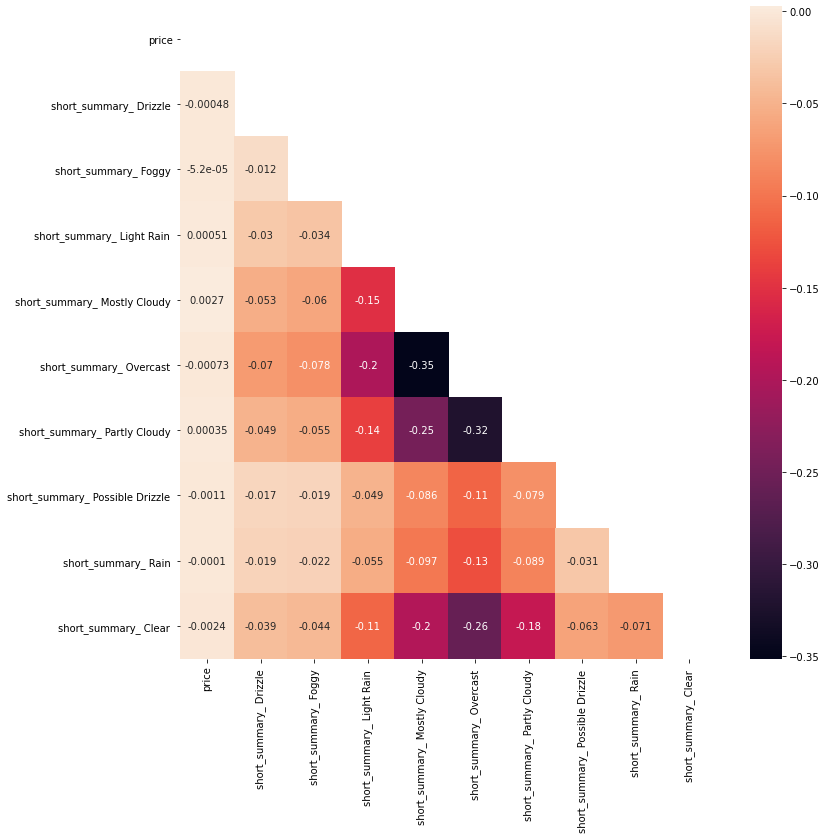

In [35]:
#membuat plot heatmap untuk melihat korelasi pada data_summ
plt.figure(figsize=(12,12))
sns.heatmap(data_summ.corr(),annot=True, mask=np.triu(data_summ.corr()))

Dari plot di atas dapat dilihat bahwa antara variabel prediktor (price) tidak memiliki korelasi dengan variabel-variabel sumary karena nilai korelasinya negatif dan ada juga yang hampir 0, sehingga variabel-variabel summary tersebut dapat dihapus.

In [36]:
# drop data column summary
summ_cols = ['short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
data = data.drop(summ_cols,axis=1)

In [37]:
print(data.shape)
data.head()

(693071, 28)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Cek data icon dengan price

In [38]:
# membuat dataframe dengan variabel price dan icon
ico_cols = ['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
data_ico = data[ico_cols]
data_ico.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

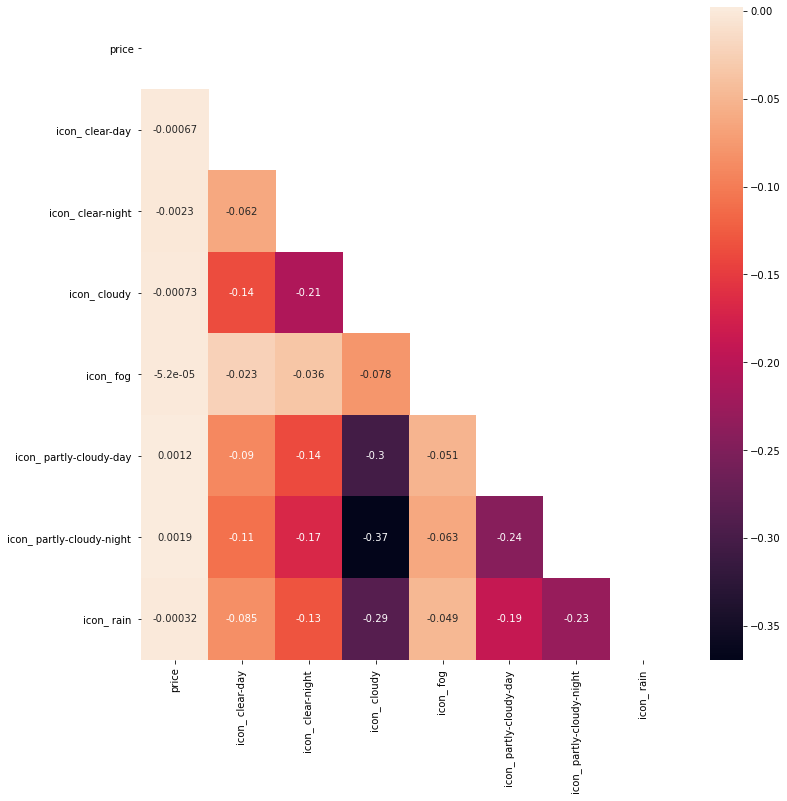

In [39]:
# membuat plot heatmap untuk melihat korelasi pada data_ico
plt.figure(figsize=(12,12))
sns.heatmap(data_ico.corr(),annot=True, mask=np.triu(data_ico.corr()))

Dari plot di atas dapat dilihat bahwa antara variabel prediktor (price) tidak memiliki korelasi dengan variabel-variabel icon karena nilai korelasinya negatif dan ada juga yang hampir 0, sehingga variabel-variabel icon tersebut dapat dihapus.

In [40]:
# drop data column icon
ico_cols = ['icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
data = data.drop(ico_cols,axis=1)

In [41]:
print(data.shape)
data.head()

(693071, 21)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cek data name dengan price

In [42]:
# membuat dataframe dengan variabel price dan name
name_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV']
data_name = data[name_cols]
data_name.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

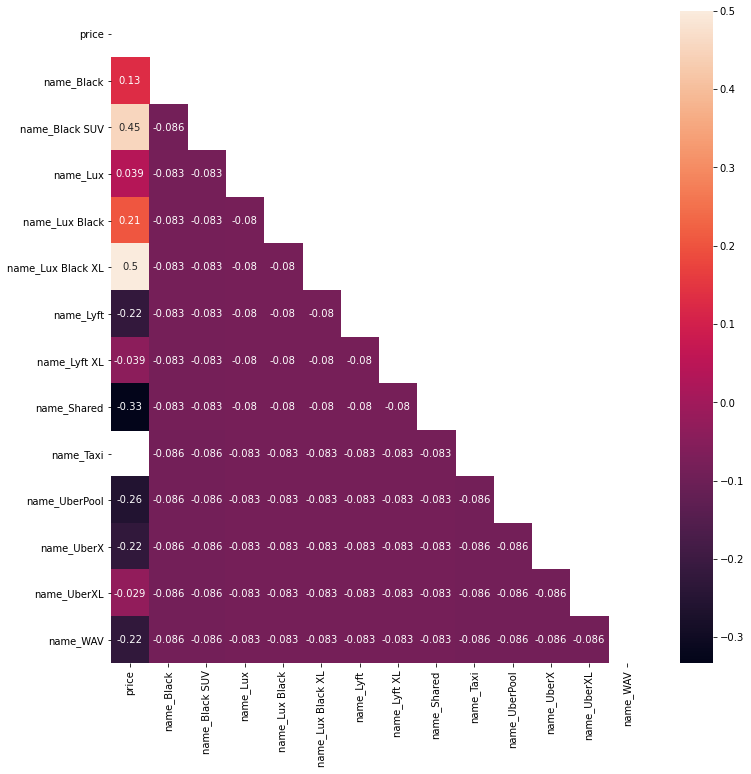

In [43]:
# membuat plot heatmap untuk melihat korelasi pada data_name
plt.figure(figsize=(12,12))
sns.heatmap(data_name.corr(),annot=True, mask=np.triu(data_name.corr()))

Dari plot di atas dapat dilihat bahwa beberapa variabel name memiliki korelasi positif dengan variabel price mencapai nilai korelasi 0.5, sehingga variabel name dapat menjadi variabel yang berpengaruh terhadap variabel price.

### Cek data remaining column dengan price

In [44]:
# membuat dataframe dengan variabel price dan variabel lainnya yang tersisa
rem_cols =['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type_Lyft','cab_type_Uber']
data_rem = data[rem_cols]
data_rem.head()

,price,hour,day,month,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
0,5.0,9,16,12,0.44,1.0,1.0,0.0
1,11.0,2,27,11,0.44,1.0,1.0,0.0
2,7.0,1,28,11,0.44,1.0,1.0,0.0
3,26.0,4,30,11,0.44,1.0,1.0,0.0
4,9.0,3,29,11,0.44,1.0,1.0,0.0


<AxesSubplot:>

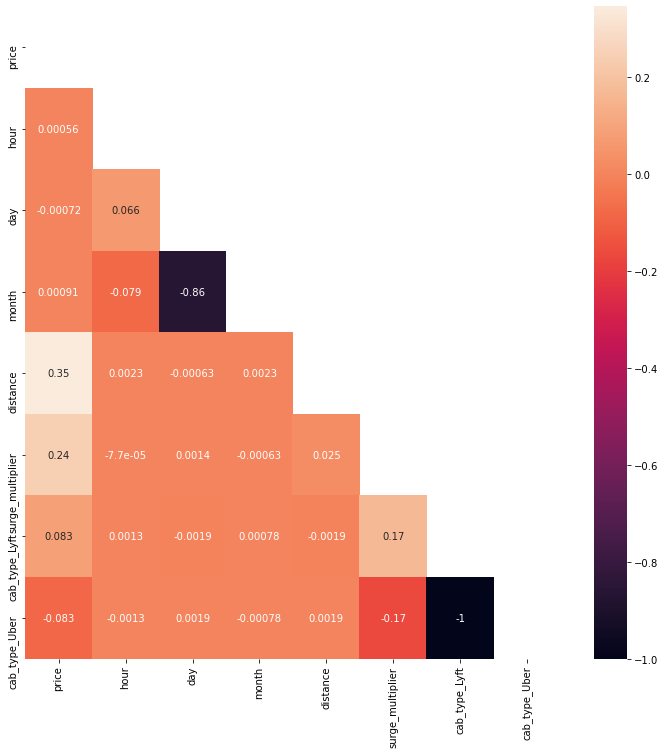

In [45]:
# membuat plot heatmap untuk melihat korelasi pada data_rem
plt.figure(figsize=(12,12))
sns.heatmap(data_rem.corr(),annot=True, mask=np.triu(data_rem.corr()))

Dari plot di atas dapat dilihat bahwa variabel yang cukup memiliki korelasi dengan variabel price yaitu **surge_multiplier** dan **distance** dengan nilai korelasi **0.24** dan **0.35**, sedangkan variabel lainnya tidak memiliki korelasi atau memiliki korelasi yang lemah dengan variabel price karena nilai korelasinya negatif ataupun hampir 0 sehingga variabel lainnya dapat dihapus.

In [46]:
data = data.drop(['month','day','hour','cab_type_Lyft','cab_type_Uber'],axis=1)
print(data.shape)
data.head()

(693071, 16)


,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cek Missing Value Pada Dataset

In [47]:
#Mengecek missing value dari dataset
data.isnull().sum()

price                55095
distance                 0
surge_multiplier         0
name_Black               0
name_Black SUV           0
name_Lux                 0
name_Lux Black           0
name_Lux Black XL        0
name_Lyft                0
name_Lyft XL             0
name_Shared              0
name_Taxi                0
name_UberPool            0
name_UberX               0
name_UberXL              0
name_WAV                 0
dtype: int64

Terdapat 55095 missing value pada data price. Sehingga untuk mengatasinya maka akan dihapus nilai NA pada data price dengan cara `.dropna` 

In [48]:
# handling missing value
data = data.dropna(subset = ['price']).reset_index()

In [49]:
# cek kembali missing value
data.shape
data.isnull().sum()

index                0
price                0
distance             0
surge_multiplier     0
name_Black           0
name_Black SUV       0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
name_Lyft            0
name_Lyft XL         0
name_Shared          0
name_Taxi            0
name_UberPool        0
name_UberX           0
name_UberXL          0
name_WAV             0
dtype: int64

Dapat dilihat bahwa sudah tidak terdapat missing value pada data, maka dapat dilanjutkan ke tahap selanjutnya yaitu cek outliers.

## Explorasi Data Analysis

### Variabel Dependen

<AxesSubplot:xlabel='price'>

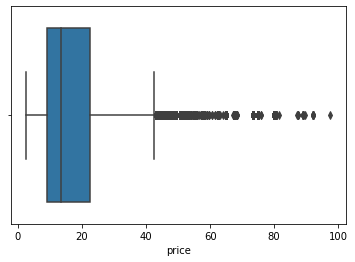

In [50]:
sns.boxplot(data['price'])

Dari boxplot di atas terlihat bahwa terdapat banyak bulatan hitam, artinya data price mengandung banyak outlier. Agar model dapat bekerja dengan baik nantinya maka outliers tersebut perlu dihilangkan dengan cara menghapus nilai data price yang melebihi batas atas(max_threshold).

In [51]:
max_threshold = data['price'].quantile(0.99)
max_threshold

42.5

Batas atas quantile yaitu 42.5

In [52]:
# melihat data price dengan nilai lebih dari max_threshold
data[data['price']>max_threshold]

,index,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
645,706,52.5,3.25,2.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,707,67.5,3.25,2.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,769,45.5,4.76,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,1094,45.5,4.31,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,1318,45.5,5.33,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,692439,47.0,5.56,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637637,692698,52.5,4.58,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637813,692891,47.5,5.42,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637878,692962,51.0,7.36,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# drop data price yang memiliki nilai lebih dari max_threshold atau lebih dari 42.5
out = np.where(data['price']>42.5)
print(out[0])
print(np.count_nonzero(np.where(data['price']>42.5)))

[   645    646    706 ... 637813 637878 637917]
5589


In [54]:
data.drop(out[0], inplace = True)
data.shape

(632387, 17)

<AxesSubplot:xlabel='price'>

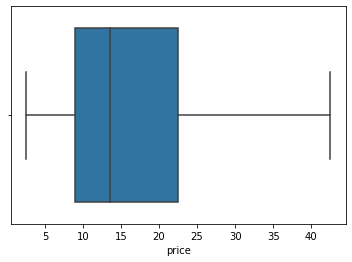

In [55]:
# cek kembali outliers
sns.boxplot(data['price'])

Dari box plot di atas dapat dilihat bahwa data price sudah tidak mengandung outliers.

### Variabel Independen

In [56]:
# membuat data frame yang berisi variabel price, distance, dan surge multiplier
data2 = data[['price','distance','surge_multiplier']]
data2.head()

,price,distance,surge_multiplier
0,5.0,0.44,1.0
1,11.0,0.44,1.0
2,7.0,0.44,1.0
3,26.0,0.44,1.0
4,9.0,0.44,1.0


In [57]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632387 entries, 0 to 637975
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             632387 non-null  float64
 1   distance          632387 non-null  float64
 2   surge_multiplier  632387 non-null  float64
dtypes: float64(3)
memory usage: 19.3 MB


In [58]:
data2.describe()

,price,distance,surge_multiplier
count,632387.000000,632387.000000,632387.000000
mean,16.245314,2.172208,1.012224
std,8.769536,1.116478,0.083163
min,2.500000,0.020000,1.000000
25%,9.000000,1.270000,1.000000
50%,13.500000,2.140000,1.000000
75%,22.500000,2.900000,1.000000
max,42.500000,7.860000,3.000000


Untuk variabel distance :
- rata-rata jarak perjalanan yaitu 2,17
- jarak terdekat yang ditempuh yaitu 0,02 sedangkan jarak terjauh yang ditemputh yaitu 7,86

Untuk variabel surge multiplier :
- data surge multiplier bernilai dari rentang 1 - 3
- rata-rata surge multiplier yaitu 1

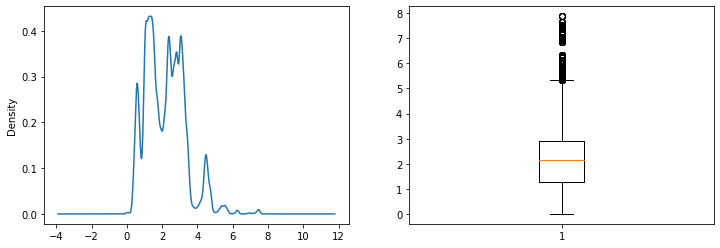

In [59]:
# melihat distribusi dari variabel distance
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
data2['distance'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(data2['distance'])
plt.show()

- Density dari distribusi variabel distance berada di sekitar angka 0 - 4
- Dari boxplot menunjukkan terdapat outliers pada variabel distance

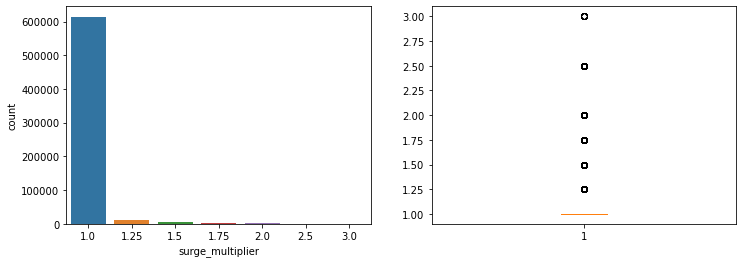

In [60]:
# melihat distribusi dari variabel surge_multiplier
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(data2['surge_multiplier'])

f.add_subplot(1,2,2)
plt.boxplot(data2['surge_multiplier'])
plt.show()

- Dari countplot terlihat bahwa sebagian besar data surge multiplier memiliki nilai 1, hanya sedikit data yang memiliki nilai 1,25 - 3
- Boxplot menunjukan terdapat outlier karena sebagian besar data bernilai 1, sehingga nilai lainnya dianggap outliers

<Figure size 720x576 with 0 Axes>

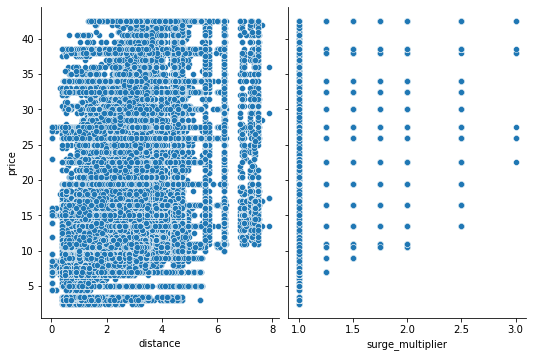

In [61]:
# melihat hubungan antara independent dan dependent variabel
plt.figure(figsize=(10,8))
sns.pairplot(data=data, x_vars=['distance','surge_multiplier'], y_vars=['price'], size=5, aspect=0.75)
plt.show()

Dari scatterplot di atas dapat dilihat bahwa polanya naik artinya variabel distance dan surge_multiplier memiliki korelasi positif dengan variabel price

In [62]:
data2.corr().style.background_gradient().set_precision(2)

,price,distance,surge_multiplier
price,1.00,0.32,0.14
distance,0.32,1.00,0.01
surge_multiplier,0.14,0.01,1.00


- Dari tabel korelasi di atas dapat dilihat bahwa variabel distance dan surge multiplier memiliki korelasi positif dengan variabel price dengan nilai 0.32 dan 0.14
- Variabel distance dan surge multiplier mempengaruhi price

## Pendefinisian Model

Setelah melalui tahap data cleaning dan preprocessing maka diperoleh data yang akan digunakan untuk pelatihan model selanjutnya. Dari hasil preprocessing, variabel yang memiliki korelasi atau berpengaruh terhadap variabel prediktor (price) yaitu variabel distance, surge_multiplier, dan name. Sehingga variabel-variabel tersebut yang akan digunakan dalam membentuk model linear regression untuk memprediksi price. Berikut datanya :

In [63]:
data.head()

,index,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Split data menjadi data training dan testing dengan ratio 70:30

In [64]:
from sklearn.model_selection import train_test_split
y = data['price'].values
X = data.drop(columns=['index','price'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Pelatihan Model

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train,y_train)

`.fit()` untuk menghitung nilai optimal dari bobot 𝑏₀ dan 𝑏₁ pada model linear regression.

In [66]:
# model intercept
print('intercept:', model.intercept_)

intercept: -2042273534122.41


In [67]:
data_column = data.drop(['index','price'], axis=1)

In [68]:
# model slope
data_column = data.drop(['index','price'], axis=1)
coef_dict = {
    'features' : data_column.columns,
    'coef_value' : model.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,distance,2.666733e+00
1,surge_multiplier,1.367067e+01
2,name_Black,2.042274e+12
3,name_Black SUV,2.042274e+12
4,name_Lux,2.042274e+12
5,name_Lux Black,2.042274e+12
6,name_Lux Black XL,2.042274e+12
7,name_Lyft,2.042274e+12
8,name_Lyft XL,2.042274e+12
9,name_Shared,2.042274e+12


Intercept dan Slope merupakan atribut dari `model` dengan keterangan :
- `.intercept_` :  𝑏0 
- `.coef_` : 𝑏1, 𝑏2, . . ., 𝑏n

In [69]:
y_pred = model.predict(X_test)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[30.69897461 37.47338867  8.29101562 ... 13.09814453  9.08764648
 15.45654297]


## Evaluasi Model

In [70]:
r_sq = model.score(X_train,y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9332386099913654


- Untuk mengetahui apakah model memberikan hasil prediksi yang baik yaitu dengan nilai coefficient of determination (𝑅²). 

- Dari `.score()` diperoleh nilai 𝑅² sebesar 0.9332386099913654 atau sebesar 93,32% maka dapat dikatakan model bekerja dengan baik karena variabel distance, surge_multiplier, dan name efektif untuk memprediksi variabel price.

- Dapat diartikan pula bahwa variabel distance, surge_multiplier, dan name merupakan faktor-faktor yang mempengaruhi price sebesar 93,32%, sedangkan 6,68% sisanya dipengaruhi oleh faktor lain.

In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

5.108391547459282
2.2601751143350115


Root Mean Squared Error (RMSE) adalah suatu metode evaluasi yang didasarkan pada total kuadratis dari simpangan antara hasil model dengan hasil observasi. Nilai RMSE menunjukkan seberapa besar error yang dimiliki model dibandingkan dengan data riil/aktual.

Model regresi di atas memiliki nilai RMSE = 2.2601751143350115 sehingga error dari model yaitu sekitar 2.26%, karena nilai errornya sangat kecil artinya nilai data hasil prediksi dekat dengan nilai data aktual sehingga dapat dikatakan bahwa model cukup akurat untuk memprediksi harga taksi.

In [72]:
pickle.dump(model, open('model_linreg.pkl','wb'))

## Prediction

####  <span style='background:yellow'>Follow  these instructions before predicting the price:</span> 
<hr>

-  **For distance**: Enter distance value using (ex : 2)

- **For Surge_multiplier** : <font color = 'red'>Enter Surge Multiplier value from 1 to 3</font>

- **for Cab Name**:  <font color = 'blue'>Put value "1" for the cab name that you want to predict and put value "0" for the rest of the cab name</font>

Misalkan prediksi harga taksi dengan kriteria sebagai berikut :
1. distance = 2.5
2. surge multiplier = 1
3. Cab Name = Lux Black XL

In [73]:
# prediksi harga taksi
# model.predict(distance, surge_multiplier, black, black SUV, lux, lux black, Black XL, Lyft, Lyft XL, Shared, Taxi, UberPool, UberX, UberXL, WAV)

model.predict([[2.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0]])

array([31.87304688])

Harga taksi Lux Black XL untuk perjalanan dengan distance 2.5 dan surge multiplier 1 diprediksi sebesar $31.87

## Kesimpulan

1. Pada project ini dilakukan prediksi harga taksi uber dan lyft dengan variabel dependen yaitu 'price', serta variabel independen yaitu 'distance', 'surge multiplier', dan 'name'


2. Variabel name merupakan data category sehingga menggunakan OneHotEncoding sehingga terbagi menjadi beberapa kolom yaitu 'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV'


3. Beberapa variabel name tersebut memiliki korelasi positif dengan variabel price mencapai nilai korelasi 0.5, sehingga variabel name merupakan variabel yang berpengaruh terhadap variabel price


4. Variabel distance dan surge multiplier juga berpengaruh terhadap memiliki korelasi positif dengan variabel price dengan nilai koreasi 0.32 dan 0.14


5. Diperoleh model regresi linier dari data dengan intercept (𝑏0) = -2042273534122.41 dan slope (𝑏1, 𝑏2, . . ., 𝑏n) sebagai berikut =

In [74]:
coef

,features,coef_value
0,distance,2.666733e+00
1,surge_multiplier,1.367067e+01
2,name_Black,2.042274e+12
3,name_Black SUV,2.042274e+12
4,name_Lux,2.042274e+12
5,name_Lux Black,2.042274e+12
6,name_Lux Black XL,2.042274e+12
7,name_Lyft,2.042274e+12
8,name_Lyft XL,2.042274e+12
9,name_Shared,2.042274e+12


6. Koefisien determinasi (𝑅²) dari model yaitu 0.9332386099913654 atau sebesar 93,32% yang berarti bahwa variabel distance, surge_multiplier, dan name merupakan faktor-faktor yang mempengaruhi price sebesar 93,32%, sedangkan 6,68% sisanya dipengaruhi oleh faktor lain. Karena nilai 𝑅² nya besar maka model bekerja dengan baik karena variabel distance, surge multiplier, dan name efektif untuk memprediksi variabel price.


7. Nilai Root Mean Squared Error (RMSE) dari model yaitu 2.2601751143350115 sehingga errornya sekitar 2.26%, karena nilai errornya sangat kecil artinya nilai data hasil prediksi dekat dengan nilai data aktual sehingga dapat dikatakan bahwa model cukup akurat untuk memprediksi harga taksi.